El primer proyecto será una <u>predicción de ventas</u> para productos alimenticios que se venden en distintas tiendas. El objetivo es ayudar a la tienda a comprender las <u>propiedades de los productos</u> y <u>establecimientos que tienen un rol crucial en aumentar las ventas</u>.



## Descarga los datos. Explora los datos: ¿Qué necesitas para limpiar estos datos?

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
sp_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PTCienciaDeDatos/PandasParaManipulaciónDeDatos/sales_predictions.csv')
sp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Aqui veo que tengo dos columnas con valores faltantes:
* Item_Weight
* Outlet_Size

In [5]:
sp_df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Aqui veo que:
* Item_Visibility puede tener valores outliers, calculando sus cuartiles el valor max deberia ser alrededor de 0.17.
* Item_Visibility tambien tiene valores en 0, considerando que es la visibilidad del producto, son items que no serán adquiridos facilmente por el cliente.
* Item_Outlet_Sales tiene valores outliers, calculando sus cuartiles el valor max deberia ser alrededor de 5,300. La disparidad puede deberse al caso anterior, de que hay productos que no tienen visibilidad.

### Analizando Columna Item_Weight

In [6]:
sp_df_wna = sp_df[sp_df['Item_Weight'].isna()]
sp_df_wna

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
...,...,...,...,...,...,...,...,...,...,...,...,...
8485,DRK37,NaN,Low Fat,0.043792,Soft Drinks,189.0530,OUT027,1985,Medium,Tier 3,Supermarket Type3,6261.8490
8487,DRG13,NaN,Low Fat,0.037006,Soft Drinks,164.7526,OUT027,1985,Medium,Tier 3,Supermarket Type3,4111.3150
8488,NCN14,NaN,Low Fat,0.091473,Others,184.6608,OUT027,1985,Medium,Tier 3,Supermarket Type3,2756.4120
8490,FDU44,NaN,Regular,0.102296,Fruits and Vegetables,162.3552,OUT019,1985,Small,Tier 1,Grocery Store,487.3656


Tengo 1463 registros de productos, sin peso.

In [7]:
sp_df_wna['Item_Identifier'].value_counts().sort_index()

DRA24    2
DRA59    2
DRB01    1
DRB25    1
DRB48    1
        ..
NCZ17    1
NCZ18    1
NCZ30    1
NCZ53    1
NCZ54    2
Name: Item_Identifier, Length: 1142, dtype: int64

In [8]:
sp_df_w = sp_df[sp_df['Item_Weight'].notna()]
sp_df_w

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


Tengo 7060 registros de productos con peso, me puede servir asociar el Item_identifier a un peso único y asi completar los valores nulos de la columna Item_Weight.

In [9]:
sp_df_w['Item_Identifier'].value_counts().sort_index()

DRA12    6
DRA24    5
DRA59    6
DRB01    2
DRB13    5
        ..
NCZ30    6
NCZ41    5
NCZ42    5
NCZ53    4
NCZ54    5
Name: Item_Identifier, Length: 1555, dtype: int64

Reviso cuantos codigos de producto tengo, hay 1555 valores unicos de 1559 que tiene la base principal, eso quiere decir que habra 4 sin poder reemplazar con la relacion codigo producto - peso.

In [10]:
base_IDproducto_peso = sp_df_w[['Item_Identifier', 'Item_Weight']].drop_duplicates()
base_IDproducto_peso.sort_index()

,Item_Identifier,Item_Weight
0,FDA15,9.300
1,DRC01,5.920
2,FDN15,17.500
3,FDX07,19.200
4,NCD19,8.930
...,...,...
7298,NCW05,20.250
7373,FDS09,8.895
7421,FDU43,19.350
7944,FDO49,10.600


In [11]:
sp_df[['Item_Identifier', 'Item_Weight']].drop_duplicates()

,Item_Identifier,Item_Weight
0,FDA15,9.30
1,DRC01,5.92
2,FDN15,17.50
3,FDX07,19.20
4,NCD19,8.93
...,...,...
8471,NCT53,5.40
8472,NCS41,NaN
8480,FDQ58,NaN
8487,DRG13,NaN


In [12]:
base_IDproducto_peso['Item_Identifier'].duplicated().sum()

0

Ahora creo un diccionario con los codigos de producto y peso, esto me sirve para reemplazar los valores faltantes.

In [13]:
dic_peso = base_IDproducto_peso.set_index('Item_Identifier')['Item_Weight'].to_dict()
dic_peso

{'FDA15': 9.3,
 'DRC01': 5.92,
 'FDN15': 17.5,
 'FDX07': 19.2,
 'NCD19': 8.93,
 'FDP36': 10.395,
 'FDO10': 13.65,
 'FDH17': 16.2,
 'FDU28': 19.2,
 'FDY07': 11.8,
 'FDA03': 18.5,
 'FDX32': 15.1,
 'FDS46': 17.6,
 'FDF32': 16.35,
 'FDP49': 9.0,
 'NCB42': 11.8,
 'FDU02': 13.35,
 'FDN22': 18.85,
 'NCB30': 14.6,
 'FDR28': 13.85,
 'NCD06': 13.0,
 'FDV10': 7.645,
 'DRJ59': 11.65,
 'FDE51': 5.925,
 'FDV38': 19.25,
 'NCS17': 18.6,
 'FDP33': 18.7,
 'FDO23': 17.85,
 'DRH01': 17.5,
 'NCX29': 10.0,
 'DRZ11': 8.85,
 'FDK43': 9.8,
 'FDA46': 13.6,
 'FDC02': 21.35,
 'FDL50': 12.15,
 'FDM39': 6.42,
 'NCP05': 19.6,
 'FDV49': 10.0,
 'FDL12': 15.85,
 'NCL17': 7.39,
 'FDM40': 10.195,
 'FDR13': 9.895,
 'FDA43': 10.895,
 'NCP18': 12.15,
 'FDK21': 7.905,
 'NCX54': 9.195,
 'DRK35': 8.365,
 'FDY21': 15.1,
 'FDM20': 10.0,
 'FDV27': 7.97,
 'FDC46': 17.7,
 'FDH19': 19.35,
 'FDZ03': 13.65,
 'DRH37': 17.6,
 'NCI17': 8.645,
 'FDJ58': 15.6,
 'FDH35': 18.25,
 'FDG02': 7.855,
 'NCZ18': 7.825,
 'FDC29': 8.39,
 'FDQ10': 12.

In [14]:
len(dic_peso)

1555

In [15]:
sp_df.loc[sp_df['Item_Weight'].isna(), 'Item_Weight'] = sp_df.loc[sp_df['Item_Weight'].isna(), 'Item_Identifier'].map(dic_peso)

Compruebo para ver los 4 productos que no tienen peso:

In [16]:
sp_df[sp_df['Item_Weight'].isna()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
927,FDN52,NaN,Regular,0.130933,Frozen Foods,86.9198,OUT027,1985,Medium,Tier 3,Supermarket Type3,1569.9564
1922,FDK57,NaN,Low Fat,0.079904,Snack Foods,120.0440,OUT027,1985,Medium,Tier 3,Supermarket Type3,4434.2280
4187,FDE52,NaN,Regular,0.029742,Dairy,88.9514,OUT027,1985,Medium,Tier 3,Supermarket Type3,3453.5046
5022,FDQ60,NaN,Regular,0.191501,Baking Goods,121.2098,OUT019,1985,Small,Tier 1,Grocery Store,120.5098


Veo que los productos tienen un correlativo, es posible que ordenando el codigo de producto se pueda ver alguna relacion con el peso.

In [17]:
filtro1 = sp_df[sp_df['Item_Identifier'].str.startswith('FDN')].sort_values(by='Item_Identifier')
filtro1[['Item_Identifier',	'Item_Weight']].drop_duplicates()

,Item_Identifier,Item_Weight
3683,FDN01,8.895
852,FDN02,16.500
6912,FDN03,9.800
2729,FDN04,11.800
3945,FDN08,7.720
1953,FDN09,14.150
2666,FDN10,11.500
3086,FDN12,15.600
3767,FDN13,18.600
4817,FDN15,17.500


Como no hay una relacion veamos si ha nivel de tienda y tipo de producto, hay alguna relacion en cuanto al peso.

In [18]:
filtro2 = sp_df[(sp_df['Item_Identifier'].str.startswith('FDN')) & (sp_df['Item_Type']=='Frozen Foods') & (sp_df['Outlet_Identifier']=='OUT027')]
filtro2[['Item_Identifier',	'Item_Weight']].drop_duplicates()

,Item_Identifier,Item_Weight
927,FDN52,NaN
1142,FDN04,11.8


Tiene muy pocos valores para inferir, por tanto vamos a usar la media agrupada por tipo de producto y codigo para completar tanto este valor como el resto de los productos.

In [19]:
FDN_df = sp_df[(sp_df['Item_Identifier'].str.startswith('FDN')) & (sp_df['Item_Type']=='Frozen Foods')]
media_FDN = FDN_df['Item_Weight'].mean()
print('El valor para FDN52 será de', round(media_FDN,2))

El valor para FDN52 será de 9.45


In [20]:
FDK_df = sp_df[(sp_df['Item_Identifier'].str.startswith('FDK')) & (sp_df['Item_Type']=='Snack Foods')]
media_FDK = FDK_df['Item_Weight'].mean()
print('El valor para FDK57 será de', round(media_FDK,2))

El valor para FDK57 será de 11.55


In [21]:
FDE_df = sp_df[(sp_df['Item_Identifier'].str.startswith('FDE')) & (sp_df['Item_Type']=='Dairy')]
media_FDE = FDE_df['Item_Weight'].mean()
print('El valor para FDE52 será de', round(media_FDE,2))

El valor para FDE52 será de 9.66


In [22]:
FDQ_df = sp_df[(sp_df['Item_Identifier'].str.startswith('FDQ')) & (sp_df['Item_Type']=='Baking Goods')]
media_FDQ = FDQ_df['Item_Weight'].mean()
print('El valor para FDQ60 será de', round(media_FDQ,2))

El valor para FDQ60 será de 12.28


In [23]:
dic_peso_2 = { 'FDN52' : 9.45,
               'FDK57' : 11.55,
               'FDE52' : 9.66,
               'FDQ60' : 12.28 }

sp_df.loc[sp_df['Item_Weight'].isna(), 'Item_Weight'] = sp_df.loc[sp_df['Item_Weight'].isna(), 'Item_Identifier'].map(dic_peso_2)

In [24]:
sp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Ya tengo todos los valores reemplazados. Convierto la columna Item_Weight a float.

In [25]:
sp_df['Item_Weight'].astype('float')

0        9.300
1        5.920
2       17.500
3       19.200
4        8.930
         ...  
8518     6.865
8519     8.380
8520    10.600
8521     7.210
8522    14.800
Name: Item_Weight, Length: 8523, dtype: float64

In [26]:
sp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


### Analizando Columna Outlet_Size

In [27]:
sp_df_sna = sp_df[sp_df['Outlet_Size'].isna()]
sp_df_sna

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344
...,...,...,...,...,...,...,...,...,...,...,...,...
8502,NCH43,8.420,Low Fat,0.070712,Household,216.4192,OUT045,2002,NaN,Tier 2,Supermarket Type1,3020.0688
8508,FDW31,11.350,Regular,0.043246,Fruits and Vegetables,199.4742,OUT045,2002,NaN,Tier 2,Supermarket Type1,2587.9646
8509,FDG45,8.100,Low Fat,0.214306,Fruits and Vegetables,213.9902,OUT010,1998,NaN,Tier 3,Grocery Store,424.7804
8514,FDA01,15.000,Regular,0.054489,Canned,57.5904,OUT045,2002,NaN,Tier 2,Supermarket Type1,468.7232


Tengo 240 registros de tamaño, con valores nulos. Revisemos cuales son los Outlet que no tienen tamaño y si tenemos alguna otra data de los mismos.

In [28]:
sp_df_sna.groupby('Outlet_Identifier')['Outlet_Size'].unique()

Outlet_Identifier
OUT010    [nan]
OUT017    [nan]
OUT045    [nan]
Name: Outlet_Size, dtype: object

In [29]:
sp_df.groupby('Outlet_Identifier')['Outlet_Size'].unique()

Outlet_Identifier
OUT010       [nan]
OUT013      [High]
OUT017       [nan]
OUT018    [Medium]
OUT019     [Small]
OUT027    [Medium]
OUT035     [Small]
OUT045       [nan]
OUT046     [Small]
OUT049    [Medium]
Name: Outlet_Size, dtype: object

No hay información para esos outlets en otros registros.

In [30]:
sp_df.groupby(['Outlet_Identifier','Outlet_Size'])['Item_Outlet_Sales'].sum()/1000

Outlet_Identifier  Outlet_Size
OUT013             High           2142.663578
OUT018             Medium         1851.822830
OUT019             Small           179.694094
OUT027             Medium         3453.926051
OUT035             Small          2268.122935
OUT046             Small          2118.395168
OUT049             Medium         2183.969810
Name: Item_Outlet_Sales, dtype: float64

No hay un relacion entre el Size y las ventas totales por establecimiento.

In [31]:
sp_df.groupby('Outlet_Location_Type')['Outlet_Size'].unique()

Outlet_Location_Type
Tier 1        [Medium, Small]
Tier 2           [nan, Small]
Tier 3    [Medium, nan, High]
Name: Outlet_Size, dtype: object

El tipo de locación también es variado.


In [32]:
sp_df.groupby('Outlet_Type')['Outlet_Size'].unique()

Outlet_Type
Grocery Store                      [nan, Small]
Supermarket Type1    [Medium, High, nan, Small]
Supermarket Type2                      [Medium]
Supermarket Type3                      [Medium]
Name: Outlet_Size, dtype: object

Podemos determinar que una Grocery Store siempre sera Small, ademas es la moda dentro de esa categoría, por tanto consideraremos:
* OUT010 igual a Small.

In [33]:
grocery_small = sp_df[sp_df['Outlet_Identifier'] == 'OUT010']
grocery_small['Outlet_Size'].fillna('Small', inplace=True)
sp_df.update(grocery_small)
sp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   float64
 8   Outlet_Size                6668 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(5), object(7)
memory usage: 799.2+ KB


<ipython-input-33-4436b57e6cc8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grocery_small['Outlet_Size'].fillna('Small', inplace=True)


Revisemos los otros 2 Outlets:
* OUT017
* OUT045

In [34]:
sp_df.groupby(['Outlet_Location_Type','Outlet_Type',])['Outlet_Size'].unique()

Outlet_Location_Type  Outlet_Type      
Tier 1                Grocery Store                [Small]
                      Supermarket Type1    [Medium, Small]
Tier 2                Supermarket Type1       [nan, Small]
Tier 3                Grocery Store                [Small]
                      Supermarket Type1             [High]
                      Supermarket Type2           [Medium]
                      Supermarket Type3           [Medium]
Name: Outlet_Size, dtype: object

In [35]:
sp_df.groupby(['Outlet_Identifier','Outlet_Size'])['Item_Identifier'].nunique()

Outlet_Identifier  Outlet_Size
OUT010             Small          555
OUT013             High           932
OUT018             Medium         928
OUT019             Small          528
OUT027             Medium         935
OUT035             Small          930
OUT046             Small          930
OUT049             Medium         930
Name: Item_Identifier, dtype: int64

Agrupando tipo de locacion y tipo de Outlet, es probale que el valor faltante para Supermarket Type1 sea Medium, pero para confirmar revisemos la moda.

Por otro lado no hay relación entre el Outlet Size y la cantidad de productos vendidos.


In [36]:
filtro_sup1 = sp_df[sp_df['Outlet_Type'] == 'Supermarket Type1']
filtro_sup1['Outlet_Size'].value_counts()

Small     1860
High       932
Medium     930
Name: Outlet_Size, dtype: int64

In [37]:
filtro_sup1.groupby(['Outlet_Location_Type'])['Outlet_Identifier'].unique()

Outlet_Location_Type
Tier 1            [OUT049, OUT046]
Tier 2    [OUT045, OUT017, OUT035]
Tier 3                    [OUT013]
Name: Outlet_Identifier, dtype: object

Revisando el valor que mas repite para Supermarket Type 1 es Small, además según muestra el Tier 2 para Supermarket Type, el outlet OUT035 es Small por tanto consideraremos:

* OUT045 igual a Small.
* OUT017 igual a Small.

In [38]:
filtro_OUT045 = sp_df[sp_df['Outlet_Identifier'] == 'OUT045']
filtro_OUT045['Outlet_Size'].fillna('Small', inplace=True)
sp_df.update(filtro_OUT045)
sp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   float64
 8   Outlet_Size                7597 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(5), object(7)
memory usage: 799.2+ KB


<ipython-input-38-311d426b40c4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtro_OUT045['Outlet_Size'].fillna('Small', inplace=True)


In [39]:
filtro_OUT017 = sp_df[sp_df['Outlet_Identifier'] == 'OUT017']
filtro_OUT017['Outlet_Size'].fillna('Small', inplace=True)
sp_df.update(filtro_OUT017)
sp_df.info()

<ipython-input-39-3f020c2aacb9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtro_OUT017['Outlet_Size'].fillna('Small', inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   float64
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(5), object(7)
memory usage: 799.2+ KB


### ¿Cuáles son algunos resúmenes estadísticos, información agregada, u otras tendencias que puedes observar en los datos usando Pandas?


In [40]:
sp_df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.874416,0.066132,140.992782,1997.831867,2181.288914
std,4.645313,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.785000,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


En Item_Visibility hay al menos un producto con valor cero, veamos si tienen ventas.

In [41]:
filtro_visib_cero = sp_df[sp_df['Item_Visibility'] == 0]
filtro_visib_cero

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.0,Fruits and Vegetables,182.0950,OUT010,1998.0,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.0,Household,53.8614,OUT013,1987.0,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.0,Baking Goods,51.4008,OUT018,2009.0,Medium,Tier 3,Supermarket Type2,556.6088
10,FDY07,11.800,Low Fat,0.0,Fruits and Vegetables,45.5402,OUT049,1999.0,Medium,Tier 1,Supermarket Type1,1516.0266
32,FDP33,18.700,Low Fat,0.0,Snack Foods,256.6672,OUT018,2009.0,Medium,Tier 3,Supermarket Type2,3068.0064
...,...,...,...,...,...,...,...,...,...,...,...,...
8480,FDQ58,7.315,Low Fat,0.0,Snack Foods,154.5340,OUT019,1985.0,Small,Tier 1,Grocery Store,459.4020
8484,DRJ49,6.865,Low Fat,0.0,Soft Drinks,129.9652,OUT013,1987.0,High,Tier 3,Supermarket Type1,2324.9736
8486,FDR20,20.000,Regular,0.0,Fruits and Vegetables,46.4744,OUT010,1998.0,Small,Tier 3,Grocery Store,45.2744
8494,NCI54,15.200,Low Fat,0.0,Household,110.4912,OUT017,2007.0,Small,Tier 2,Supermarket Type1,1637.8680


Revisando vemos que corresponde a 526 registros de los cuales si tenemos ventas, y los registros provienen de dos tiendas OUT010 y OUT049. Podría entenderse que si bien los productos no son visibles los clientes los solicitan a pedido.

In [42]:
filtro_visib_cero.groupby(['Outlet_Identifier', 'Item_Type'])['Item_Outlet_Sales'].sum()

Outlet_Identifier  Item_Type            
OUT010             Breads                     585.2382
                   Canned                     188.4214
                   Frozen Foods               873.5296
                   Fruits and Vegetables     2557.3378
                   Hard Drinks                129.8310
                                               ...    
OUT049             Meat                      1896.1984
                   Others                    1120.5414
                   Snack Foods              12507.7188
                   Soft Drinks               4223.1694
                   Starchy Foods             4296.4074
Name: Item_Outlet_Sales, Length: 132, dtype: float64

In [43]:
sp_df.groupby(['Item_Identifier', 'Outlet_Identifier'])['Item_MRP'].mean().reset_index()

,Item_Identifier,Outlet_Identifier,Item_MRP
0,DRA12,OUT010,143.0154
1,DRA12,OUT013,142.3154
2,DRA12,OUT017,140.3154
3,DRA12,OUT018,142.0154
4,DRA12,OUT035,141.9154
...,...,...,...
8518,NCZ54,OUT019,160.9552
8519,NCZ54,OUT027,164.0552
8520,NCZ54,OUT045,162.4552
8521,NCZ54,OUT046,161.9552


Cada Outlet tiene el poder de modificar el precio de sus productos, sin embargo la variación significativa sólo es entre distintos tipos de productos, dentro de los mismos no es considerable.

In [44]:
sp_df.groupby('Outlet_Location_Type')['Item_Outlet_Sales'].sum()/1000

Outlet_Location_Type
Tier 1    4482.059072
Tier 2    6472.313706
Tier 3    7636.752632
Name: Item_Outlet_Sales, dtype: float64

El grupo de tiendas que mas ventas ha realizado es el Tier 3.

In [45]:
outlets_tier3 = sp_df[sp_df['Outlet_Location_Type'] == 'Tier 3']
outlets_tier3.groupby('Outlet_Identifier')['Item_Outlet_Sales'].sum().sort_values(ascending=False)/1000

Outlet_Identifier
OUT027    3453.926051
OUT013    2142.663578
OUT018    1851.822830
OUT010     188.340172
Name: Item_Outlet_Sales, dtype: float64

Estas son los 4 outlets que realizaron más ventas.

In [46]:
outlets_tier1 = sp_df[sp_df['Outlet_Location_Type'] == 'Tier 1']
outlets_tier1.groupby('Outlet_Identifier')['Item_Outlet_Sales'].sum().sort_values()/1000

Outlet_Identifier
OUT019     179.694094
OUT046    2118.395168
OUT049    2183.969810
Name: Item_Outlet_Sales, dtype: float64

Estas son los 3 outlets que realizaron menos ventas.

In [47]:
sp_df['Cantidades_vendidas'] = sp_df['Item_Outlet_Sales'] / sp_df['Item_MRP']
Cantidades_vendidas_por_item = sp_df.groupby(['Item_Identifier', 'Item_Type'])['Cantidades_vendidas'].sum()
top_10_items = Cantidades_vendidas_por_item.sort_values(ascending=False).head(10)
top_10_items

Item_Identifier  Item_Type            
NCL31            Others                   183.840043
FDO19            Fruits and Vegetables    183.074268
FDW13            Canned                   177.901653
FDL34            Snack Foods              177.790164
FDJ21            Snack Foods              173.096500
NCK53            Health and Hygiene       172.117134
FDT55            Fruits and Vegetables    171.783009
NCB18            Household                167.735616
FDG38            Canned                   166.884902
FDA15            Dairy                    166.633479
Name: Cantidades_vendidas, dtype: float64

Estos son los 10 productos mas vendidos, y las categorias a la que pertenecen.



##Crea varias visualizaciones de datos que te ayuden a entender mejor los datos con los que estás trabajando (análisis exploratorio de datos) y que ayude a otras personas entender las tendencias en los datos (análisis explicativo de datos).


## Analisis exploratorio de los datos (EDA)

In [48]:
sp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   float64
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  Cantidades_vendidas        8523 non-null   float64
dtypes: float64(6), object(7)
memory usage: 865.7+ KB

In [49]:
sp_df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Cantidades_vendidas
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.874416,0.066132,140.992782,1997.831867,2181.288914,15.425685
std,4.645313,0.051598,62.275067,8.371760,1706.499616,9.192655
min,4.555000,0.000000,31.290000,1985.000000,33.290000,0.952322
25%,8.785000,0.026989,93.826500,1987.000000,834.247400,8.949479
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000,14.926893
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400,21.092696
max,21.350000,0.328391,266.888400,2009.000000,13086.964800,56.844890


In [50]:
sp_df[sp_df['Item_MRP'] > 100]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Cantidades_vendidas
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999.0,Medium,Tier 1,Supermarket Type1,3735.1380,14.951963
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999.0,Medium,Tier 1,Supermarket Type1,2097.2700,14.809346
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998.0,Small,Tier 3,Grocery Store,732.3800,4.021967
7,FDP10,19.000,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985.0,Medium,Tier 3,Supermarket Type3,4022.7636,37.330006
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007.0,Small,Tier 2,Supermarket Type1,4710.5350,25.079863
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8515,FDH24,20.700,Low Fat,0.021518,Baking Goods,157.5288,OUT018,2009.0,Medium,Tier 3,Supermarket Type2,1571.2880,9.974608
8517,FDF53,20.750,reg,0.083607,Frozen Foods,178.8318,OUT046,1997.0,Small,Tier 1,Supermarket Type1,3608.6360,20.178939
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987.0,High,Tier 3,Supermarket Type1,2778.3834,12.951520
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002.0,Small,Tier 2,Supermarket Type1,549.2850,5.078589


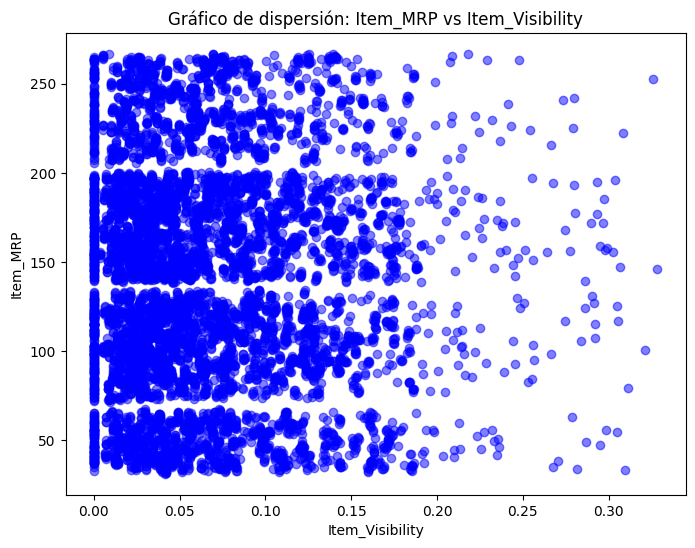

In [51]:
plt.figure(figsize=(8, 6))  # Tamaño del gráfico (ancho, alto)

sp_df_sorted = sp_df.sort_values(by=['Item_Visibility', 'Item_MRP'])

plt.scatter(sp_df_sorted['Item_Visibility'], sp_df_sorted['Item_MRP'], c='blue', alpha=0.5)  # Graficar 'Item_Visibility' vs 'Item_MRP'
#plt.yticks(sp_df.index,sp_df['Item_MRP'] )  # Etiquetas en el eje y

plt.locator_params(nbins=10)


plt.xlabel('Item_Visibility')  # Etiqueta del eje x
plt.ylabel('Item_MRP')  # Etiqueta del eje y
plt.title('Gráfico de dispersión: Item_MRP vs Item_Visibility')  # Título del gráfico
plt.show()

Interpretación:
* Para los productos con precio menor a 100 USD la visibilidad de los items no es un factor determinante. Esto puede descartar cualquier publicidad que se realice a determinado producto ya que su precio en el mercado no se va a modificar conforme aumente su visibilidad.

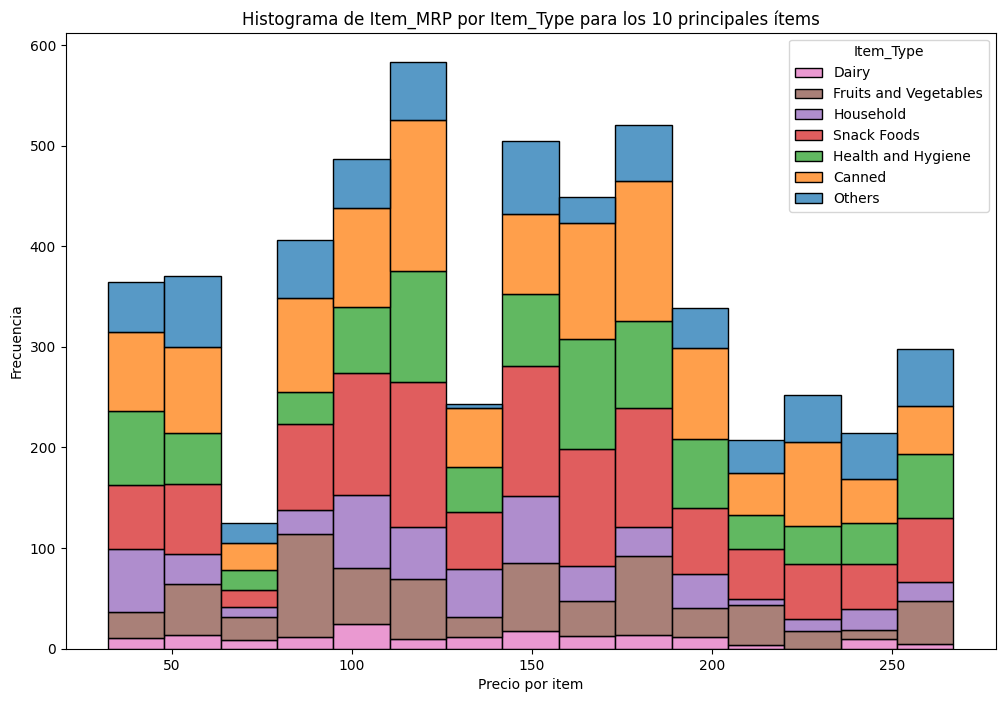

In [52]:
filtered_df = sp_df[sp_df['Item_Type'].isin(top_10_items.index.get_level_values('Item_Type'))]

# Paso 2: Crear el histograma
plt.figure(figsize=(12, 8))
sns.histplot(data=filtered_df, x='Item_MRP', hue='Item_Type', multiple='stack', bins=15)
plt.title('Histograma de Item_MRP por Item_Type para los 10 principales ítems')
plt.xlabel('Precio por item')
plt.ylabel('Frecuencia')
item_type_labels = filtered_df['Item_Type'].unique()

# Establecer las etiquetas en la leyenda
plt.legend(title='Item_Type', labels=item_type_labels)
plt.show()



iNTERPRETACION:

Se observa que gran parte de los precios de los productos se encuentra en 3 franjas importantes: debajo de 70 USD, y en el rango de precios de 80 a 125 USD, y de 140 a 190 USD.

De estos 3, tenemos destaca el segmento de precios que rodean el valor de 100 USD, de forma general para las 10 categorías de productos más vendidos.

Esta información sería muy interesante para poder aplicar una estrategia de precios, junto con promociones o descuentos por el area de marketing, de forma que los productos recaigan en ese margen, logrando aumentar las ventas.

In [53]:
sp_df_precio = sp_df[(sp_df['Item_MRP'] >= 80) & (sp_df['Item_MRP'] <= 100)]
sp_df_precio

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Cantidades_vendidas
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002.0,Small,Tier 2,Supermarket Type1,1076.5986,11.102091
31,NCS17,18.600,Low Fat,0.080829,Health and Hygiene,96.4436,OUT018,2009.0,Medium,Tier 3,Supermarket Type2,2741.7644,28.428682
33,FDO23,17.850,Low Fat,0.000000,Breads,93.1436,OUT045,2002.0,Small,Tier 2,Supermarket Type1,2174.5028,23.345703
39,FDB34,15.250,Low Fat,0.026481,Snack Foods,87.6198,OUT027,1985.0,Medium,Tier 3,Supermarket Type3,2180.4950,24.885871
61,FDV27,7.970,Regular,0.040071,Meat,87.3514,OUT045,2002.0,Small,Tier 2,Supermarket Type1,1062.6168,12.164851
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8476,NCO41,12.500,Low Fat,0.018887,Health and Hygiene,98.8384,OUT045,2002.0,Small,Tier 2,Supermarket Type1,1280.9992,12.960542
8479,FDL10,8.395,Low Fat,0.039554,Snack Foods,99.1042,OUT049,1999.0,Medium,Tier 1,Supermarket Type1,2579.3092,26.026235
8489,FDV13,17.350,Regular,0.027723,Canned,89.6856,OUT018,2009.0,Medium,Tier 3,Supermarket Type2,2109.2544,23.518317
8513,FDH31,12.000,Regular,0.020407,Meat,99.9042,OUT035,2004.0,Small,Tier 2,Supermarket Type1,595.2252,5.957960


## Analisis explicativo de Datos

In [54]:
sp_df['Outlet_Establishment_Year'] = sp_df['Outlet_Establishment_Year'].astype(str).apply(lambda x: x.split('.')[0])

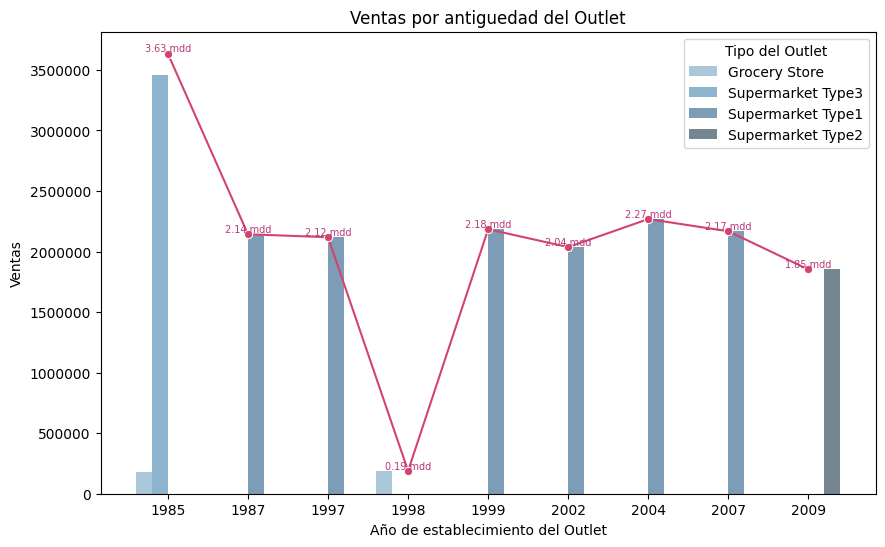

In [90]:


ventas_por_ano = sp_df.groupby('Outlet_Establishment_Year')['Item_Outlet_Sales'].sum().reset_index()

plt.figure(figsize=(10, 6))

sns.barplot(data=sp_df_antiguedad, x='Outlet_Establishment_Year', y='Item_Outlet_Sales', hue='Outlet_Type', dodge=True, palette='Blues_d', alpha=0.7)

lineplot = sns.lineplot(data=ventas_por_ano, x='Outlet_Establishment_Year', y='Item_Outlet_Sales', marker='o', color='#d3436e')

for index, row in ventas_por_ano.iterrows():
    ventas_mdd = row['Item_Outlet_Sales'] / 1000000  # Dividir por un millón
    lineplot.text(row['Outlet_Establishment_Year'], row['Item_Outlet_Sales'], '{:.2f} mdd'.format(ventas_mdd), size = 7, color='#b73779', ha='center', va='bottom')

plt.xlabel('Año de establecimiento del Outlet')
plt.ylabel('Ventas')
plt.title('Ventas por antiguedad del Outlet', color = 'black')
plt.legend(title='Tipo del Outlet')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:.0f}'.format(x)))
plt.show()



Interpretación:

Las tiendas que se establecieron en el año de 1985 son las que representan la mayor cantidad de ventas, lo que significa que podría haber construido una base de clientes leales y una reputación sólida a lo largo de los años.

Otro factor a ser analizado es que las tiendas establecidas en 1985 se trata de tiendas del tipo "Supermarket Type 3". Por tanto una buena estrategia seria generar tiendas más tiendas de dicho tipo, ya sea tomando como base la estrategia de marketing o su zona geográfica.

In [58]:
sp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   object 
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  Cantidades_vendidas        8523 non-null   float64
dtypes: float64(5), object(8)
memory usage: 865.7+ KB

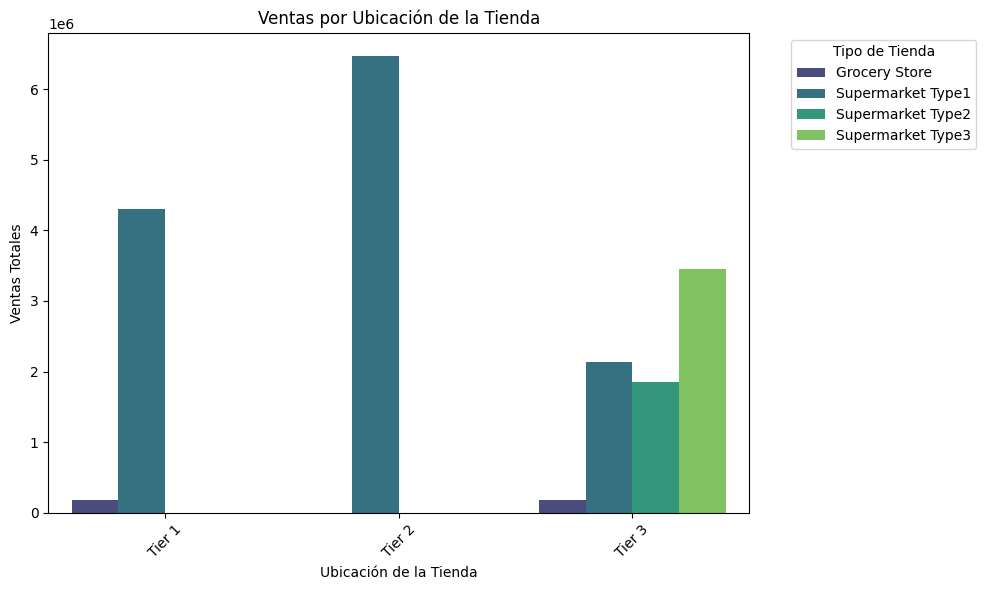

In [59]:
df_ubicacion = sp_df.groupby(['Outlet_Location_Type', 'Outlet_Type'])['Item_Outlet_Sales'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=df_ubicacion, x='Outlet_Location_Type', y='Item_Outlet_Sales', hue='Outlet_Type', dodge=True, palette='viridis')

plt.title('Ventas por Ubicación de la Tienda')
plt.xlabel('Ubicación de la Tienda')
plt.ylabel('Ventas Totales')
plt.xticks(rotation=45)
plt.legend(title='Tipo de Tienda', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()



Interpretación:

Tanto las tiendas ubicadas en el Tier 1 como el Tier 2 generan mayor cantidad de ventas, esto significa que estos lugares son una posición estratégica para crear nuevas tiendas. Sin embargo, en el  grafico analizaremos que productos son vendidos en cada una de las tiendas.

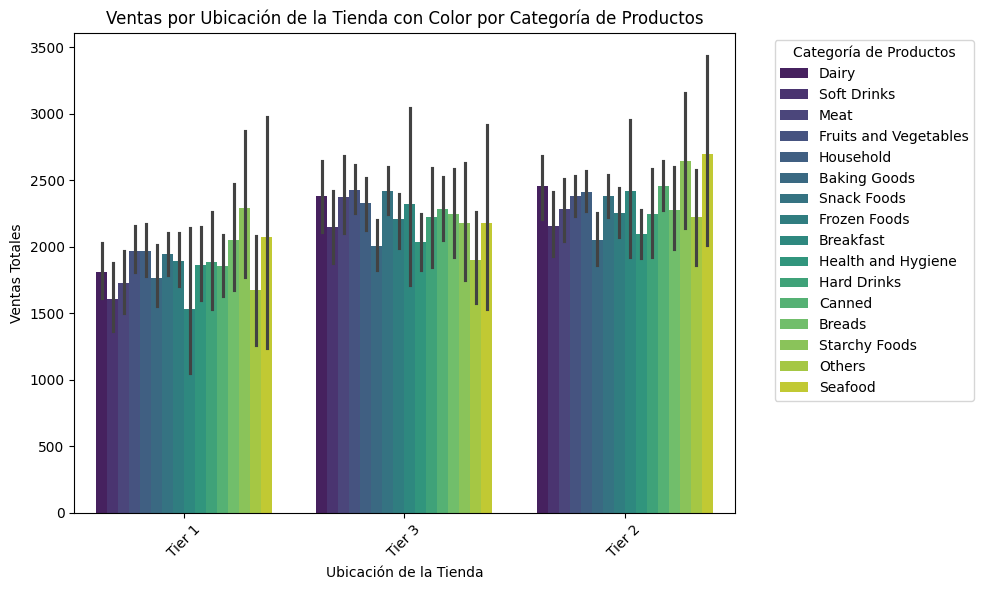

In [60]:
plt.figure(figsize=(10, 6))
sns.barplot(data=sp_df, x='Outlet_Location_Type', y='Item_Outlet_Sales', hue='Item_Type', palette='viridis')
plt.title('Ventas por Ubicación de la Tienda con Color por Categoría de Productos')
plt.xlabel('Ubicación de la Tienda')
plt.ylabel('Ventas Totales')
plt.xticks(rotation=45)
plt.legend(title='Categoría de Productos', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()



Interpretación:

Observamos que tanto Tier 2 como Tier 3 tienen como productos principal los al tipo Seafood, y en un segundo lugar destaca Starchy Foods y Breakfast respectivamente. Este patron de tener a Seafood como uno de los productos mas vendidos tambien se repite en Tier 1, aunque alli en cambio se destaca los productos tipos Bread. Esta combinación de preferencias de productos por ubicación es ideal para identificar patrones de consumo y de comportamiento del consumidor.